In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('advertising.csv')

# Split data into features (X) and target variable (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Example: Predict sales for new data
new_data = {
    'TV': [150, 200],
    'Radio': [25, 30],
    'Newspaper': [50, 60]
}

new_df = pd.DataFrame(new_data)
new_predictions = model.predict(new_df)
print("Predicted Sales for New Data:")
for i, prediction in enumerate(new_predictions):
    print(f"Sample {i+1}: {prediction:.2f}")


Mean Squared Error: 2.91
R-squared: 0.91
Predicted Sales for New Data:
Sample 1: 15.63
Sample 2: 18.90


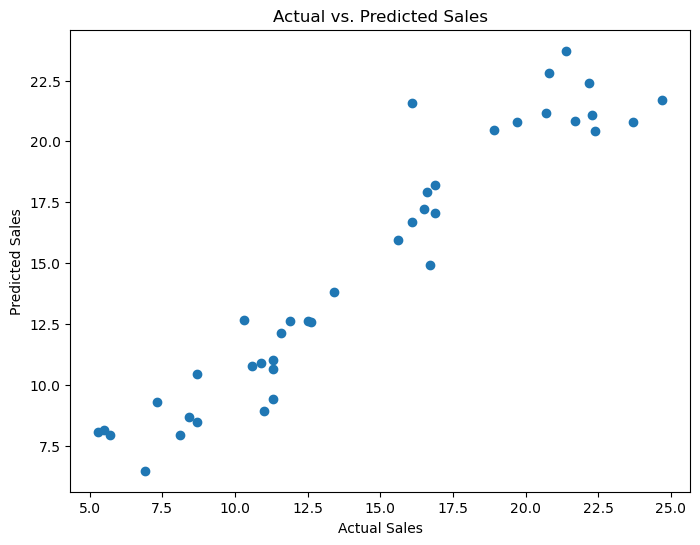

In [5]:
# Scatter plot of actual vs. predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

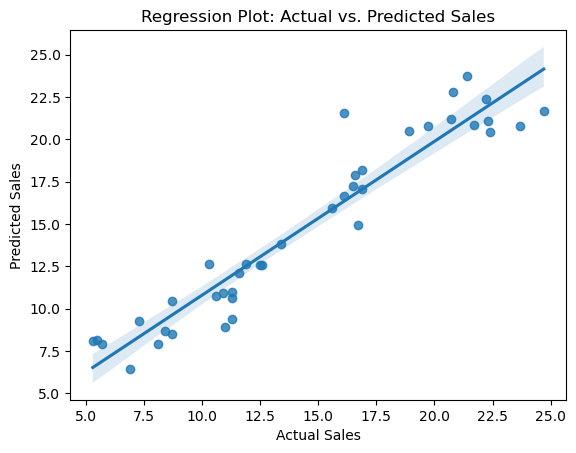

In [6]:
# Regression plot
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Regression Plot: Actual vs. Predicted Sales')
plt.show()

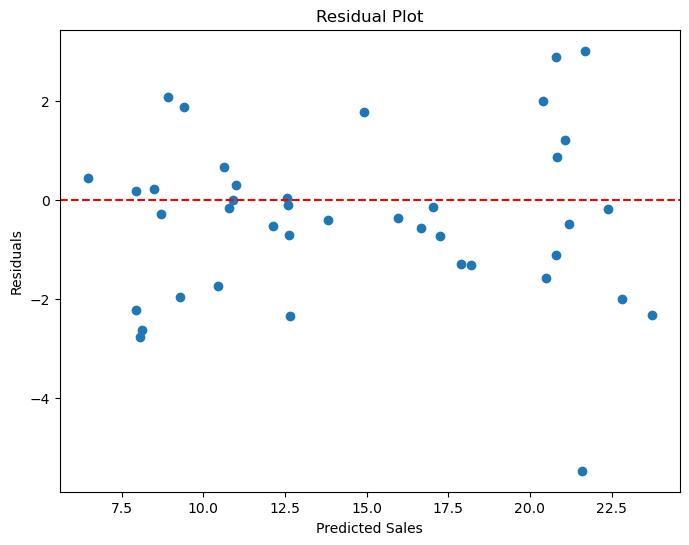

In [7]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

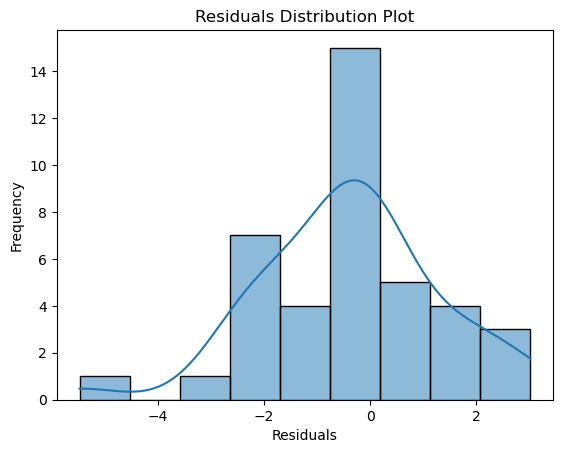

In [9]:
# Residuals distribution plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution Plot')
plt.show()

In [11]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

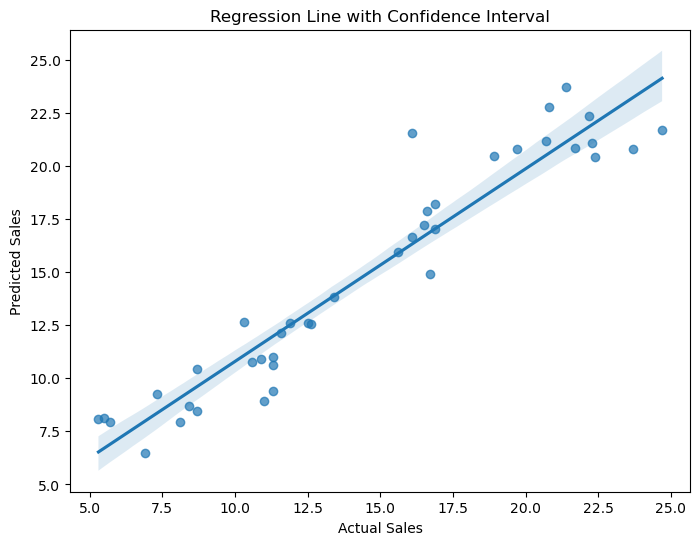

In [12]:
# Regression line with confidence interval
plt.figure(figsize=(8, 6))
sns.regplot(x='Actual', y='Predicted', data=comparison_df, scatter_kws={'alpha':0.7})
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Regression Line with Confidence Interval')
plt.show()

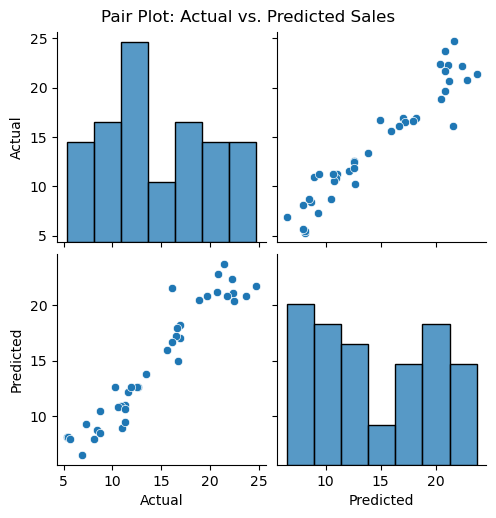

In [13]:
# Pair plot for actual vs. predicted values
sns.pairplot(comparison_df)
plt.suptitle('Pair Plot: Actual vs. Predicted Sales', y=1.02)
plt.show()